# 1. Download Data


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hinetabi","key":"7a1bc1e0c01bcd7885ceb96d05ee300d"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                             title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ------------------------------------------  ------  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                               9KB  2022-10-06 08:55:25           7550        246  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset        11KB  2022-09-30 04:05:11           6059        198  1.0              
dimitryzub/walmart-coffee-listings-from-500-stores              Walmart Coffee Listings from 500 stores       85KB  2022-10-25 09:20:12            695         27  1.0              
whenamancodes/students-performance

In [ ]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 35.0MB/s]


In [ ]:
!unzip '/content/stroke-prediction-dataset.zip' -d data

Archive:  /content/stroke-prediction-dataset.zip
  inflating: data/healthcare-dataset-stroke-data.csv  


In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/data/healthcare-dataset-stroke-data.csv")
display(df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#2. EDA

##Data's summary

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df2 = df.copy()

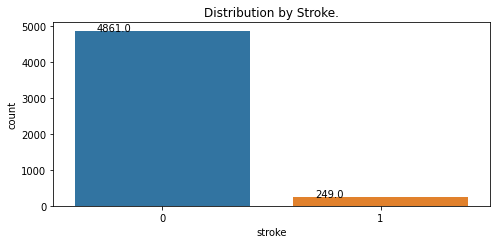

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x = df2['stroke'])
plt.title('Distribution by Stroke.')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.show()

##Relationship between Hypertension and Stroke

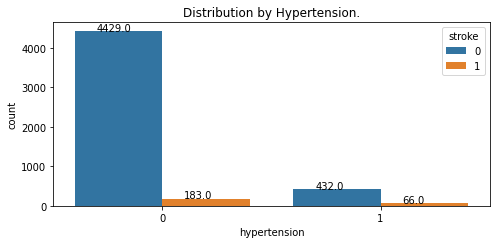

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x = df2['hypertension'], hue = df['stroke'])
plt.title('Distribution by Hypertension.')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.show()

#The likelihood of stroke in person have hypertension is higher.
#13% vs 4%

##Relationship between Gender and Stroke

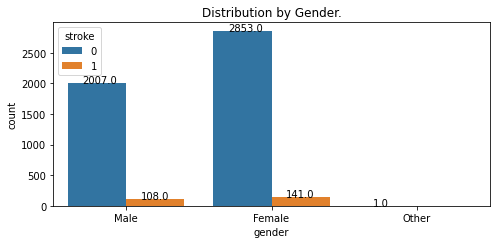

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x = df2['gender'], hue = df['stroke'])
plt.title('Distribution by Gender.')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.show()
#The proportion of people who had a stroke in the hypertension category is much higher than the proportion of people who had a stroke in the No hypertension category
#But the number of people who had hypertension is significantly lower than the number of people who didn't, so it cannot be confidently concluded that people with hypertension is more likely to suffer from a stroke than people with no hypertension

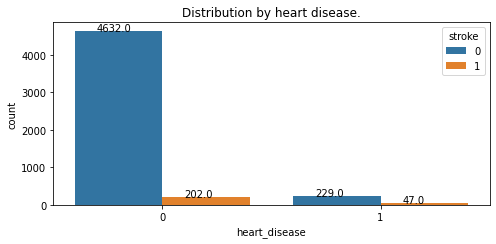

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x = df2['heart_disease'], hue = df2['stroke'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.title('Distribution by heart disease.')
plt.show()


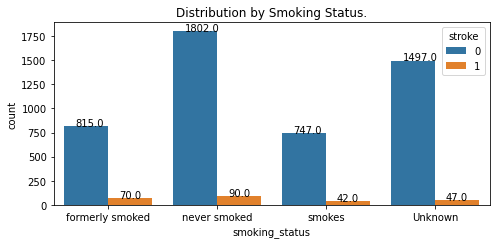

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x = df2['smoking_status'], hue = df['stroke'])
plt.title('Distribution by Smoking Status.')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.show()

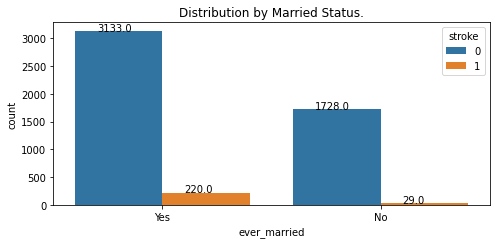

In [ ]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x = df2['ever_married'], hue = df['stroke'])
plt.title('Distribution by Married Status.')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.show()

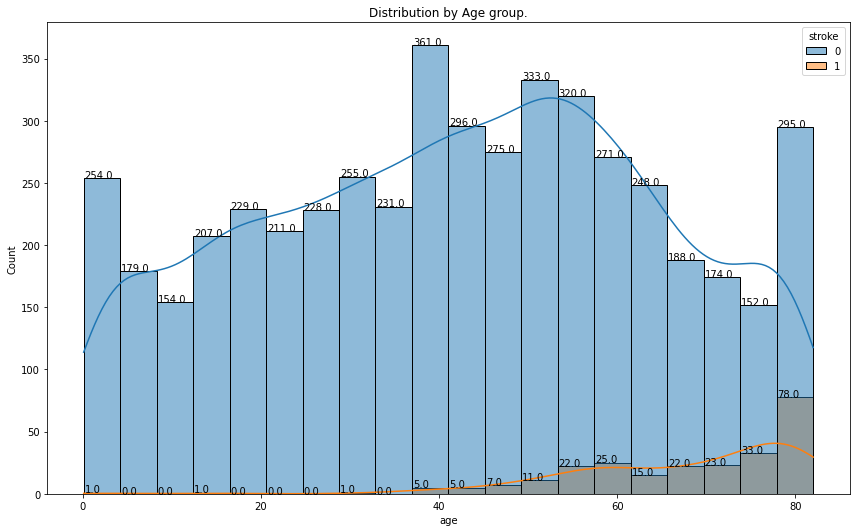

In [ ]:
plt.rcParams["figure.figsize"] = [12.00, 7.50]
plt.rcParams["figure.autolayout"] = True
#plt.figure(figsize = (12, 7))
ax = sns.histplot(df2, x="age", kde=True, hue = 'stroke')
plt.title('Distribution by Age group.')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.01))
plt.show()
# Most people having a stroke are old people 'cause as age increases, there are more favorable factors for the disease to appear

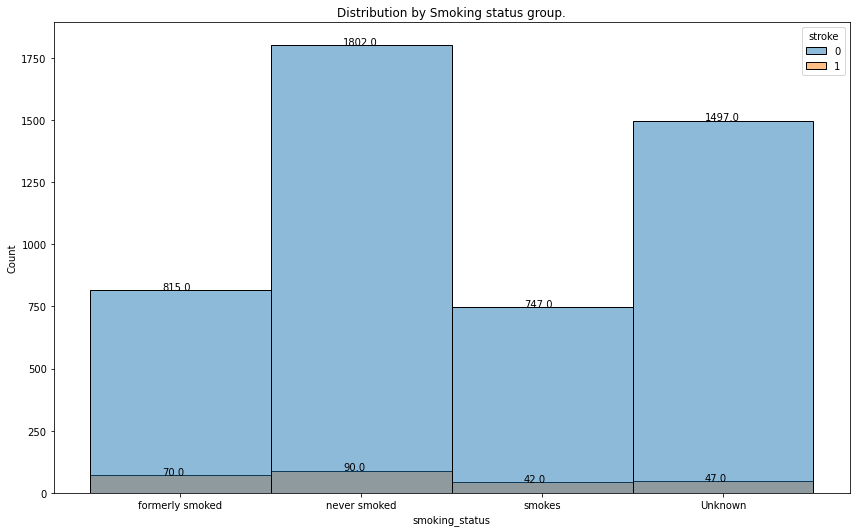

In [ ]:
plt.rcParams["figure.figsize"] = [12.00, 7.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.histplot(df2, x="smoking_status", hue = 'stroke')
plt.title('Distribution by Smoking status group.')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.05))
plt.show()
#formerly: 7.9%, never: 4.7%, smoke: 5.3%

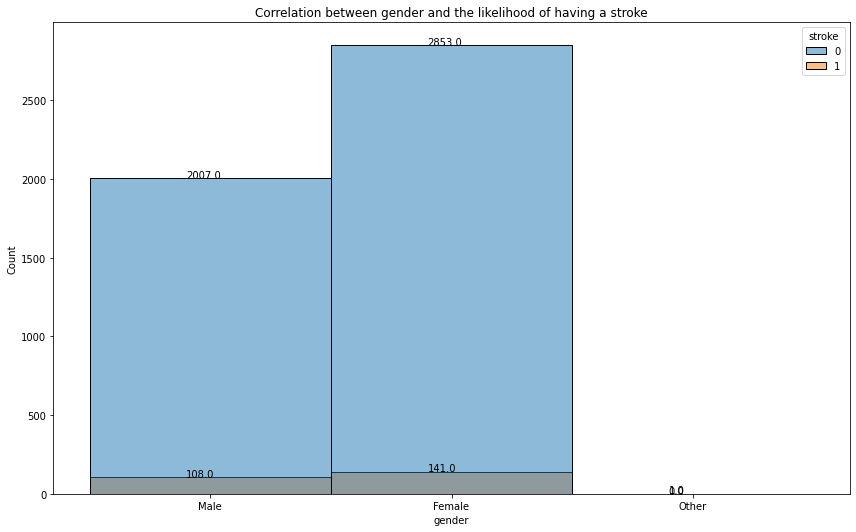

In [ ]:
plt.rcParams["figure.figsize"] = [12.00, 7.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.histplot(df2, x='gender',hue = 'stroke')
plt.title("Correlation between gender and the likelihood of having a stroke")
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.05))
plt.show()
#Female: 4.7% stroke, Male: 5.1% stroke

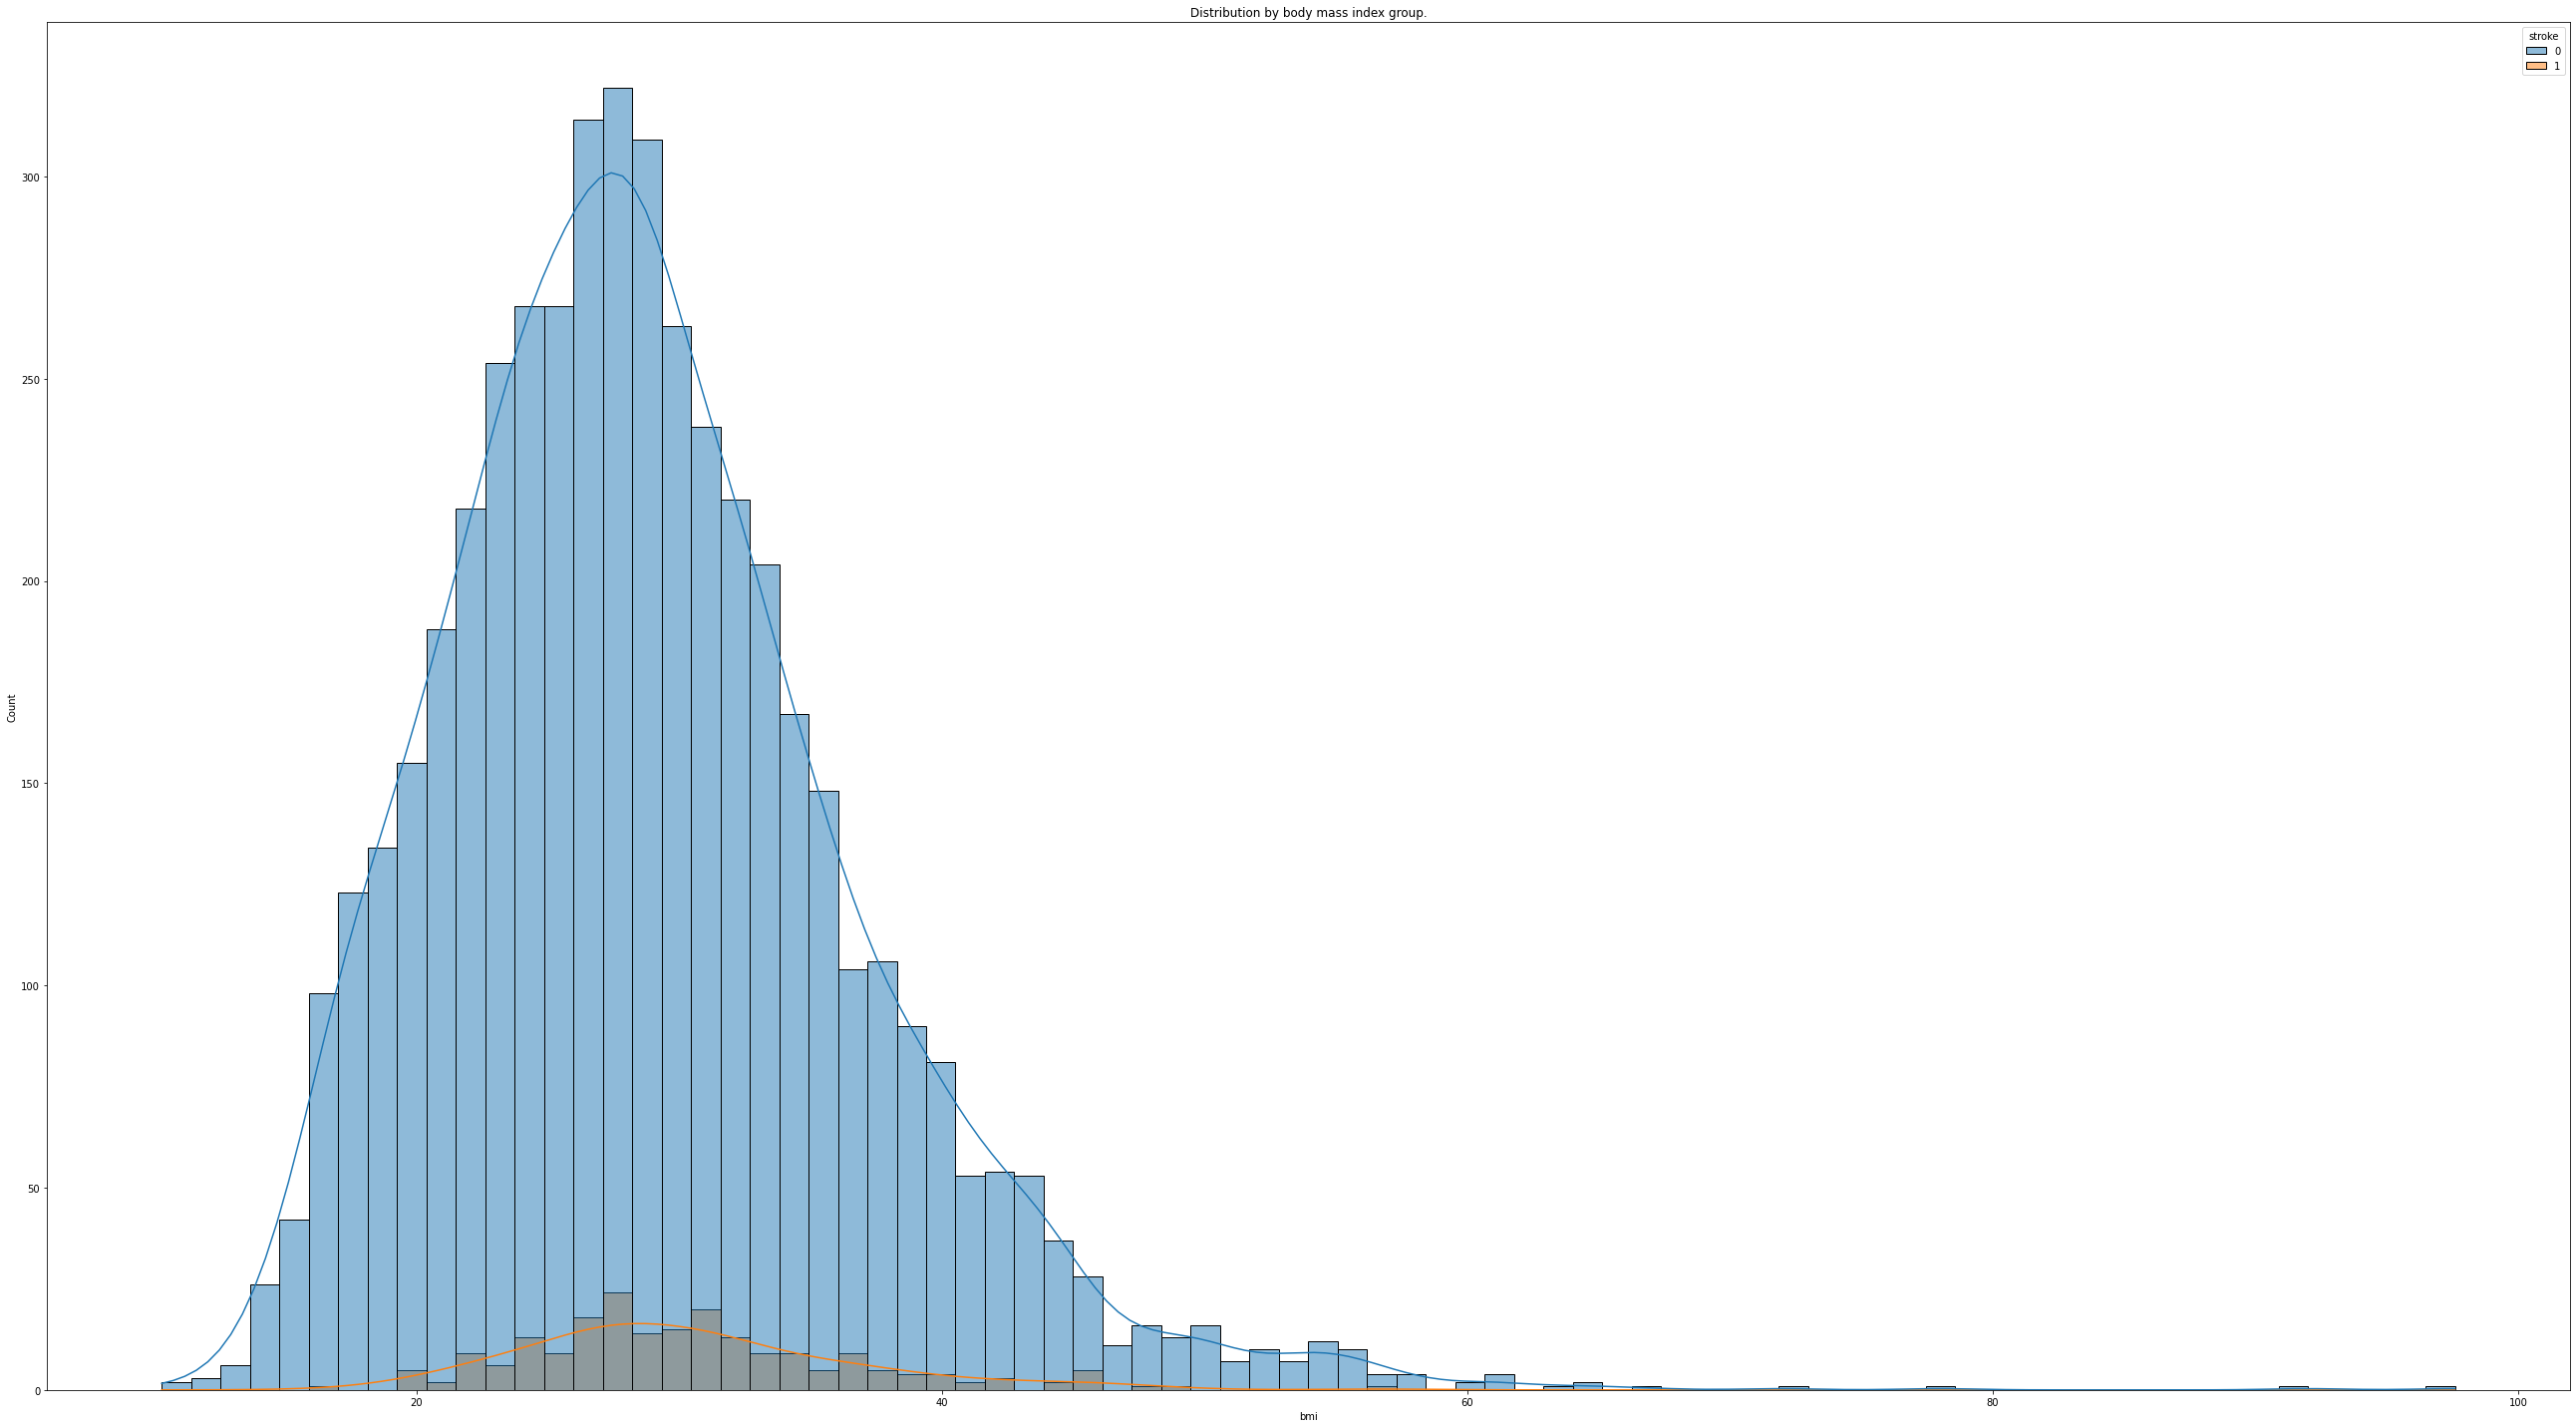

In [ ]:
plt.figure(figsize = (36, 20))
sns.histplot(df, x="bmi", kde=True, hue = 'stroke')
plt.title('Distribution by body mass index group.')
plt.show()

In [ ]:
print('People have BMI < mean of BMI: ')
print(df[(df.bmi < df.bmi.mean()) & (df.stroke == 1)].bmi.count()/ df[(df.bmi < df.bmi.mean())].bmi.count()*100)
print('People have BMI >= mean of BMI: ')
print(df[(df.bmi >= df.bmi.mean()) & (df.stroke == 1)].bmi.count()/ df[(df.bmi >= df.bmi.mean())].bmi.count()*100)

People have BMI < mean of BMI: 
3.5595105672969964
People have BMI >= mean of BMI: 
5.108499095840868


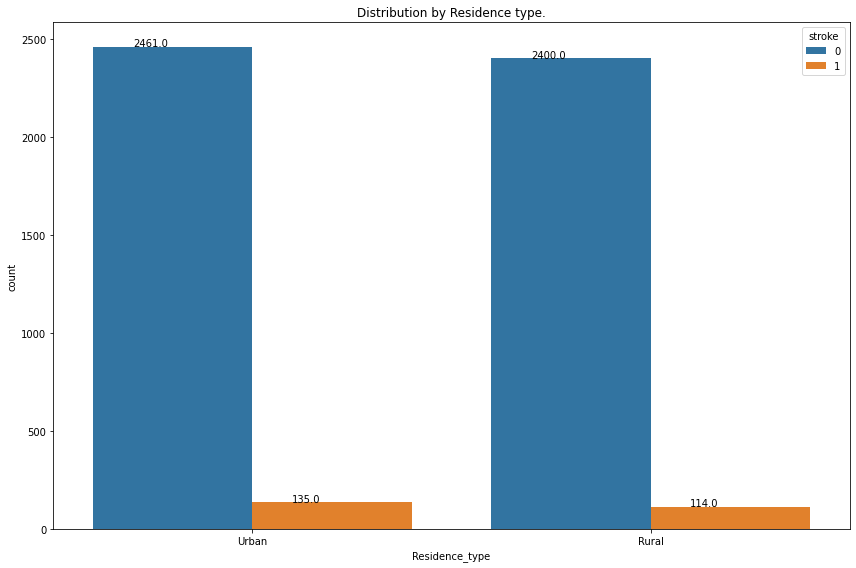

In [ ]:
plt.rcParams["figure.figsize"] = [12.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = df2['Residence_type'], hue = df['stroke'])
plt.title('Distribution by Residence type.')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.05))
plt.show()

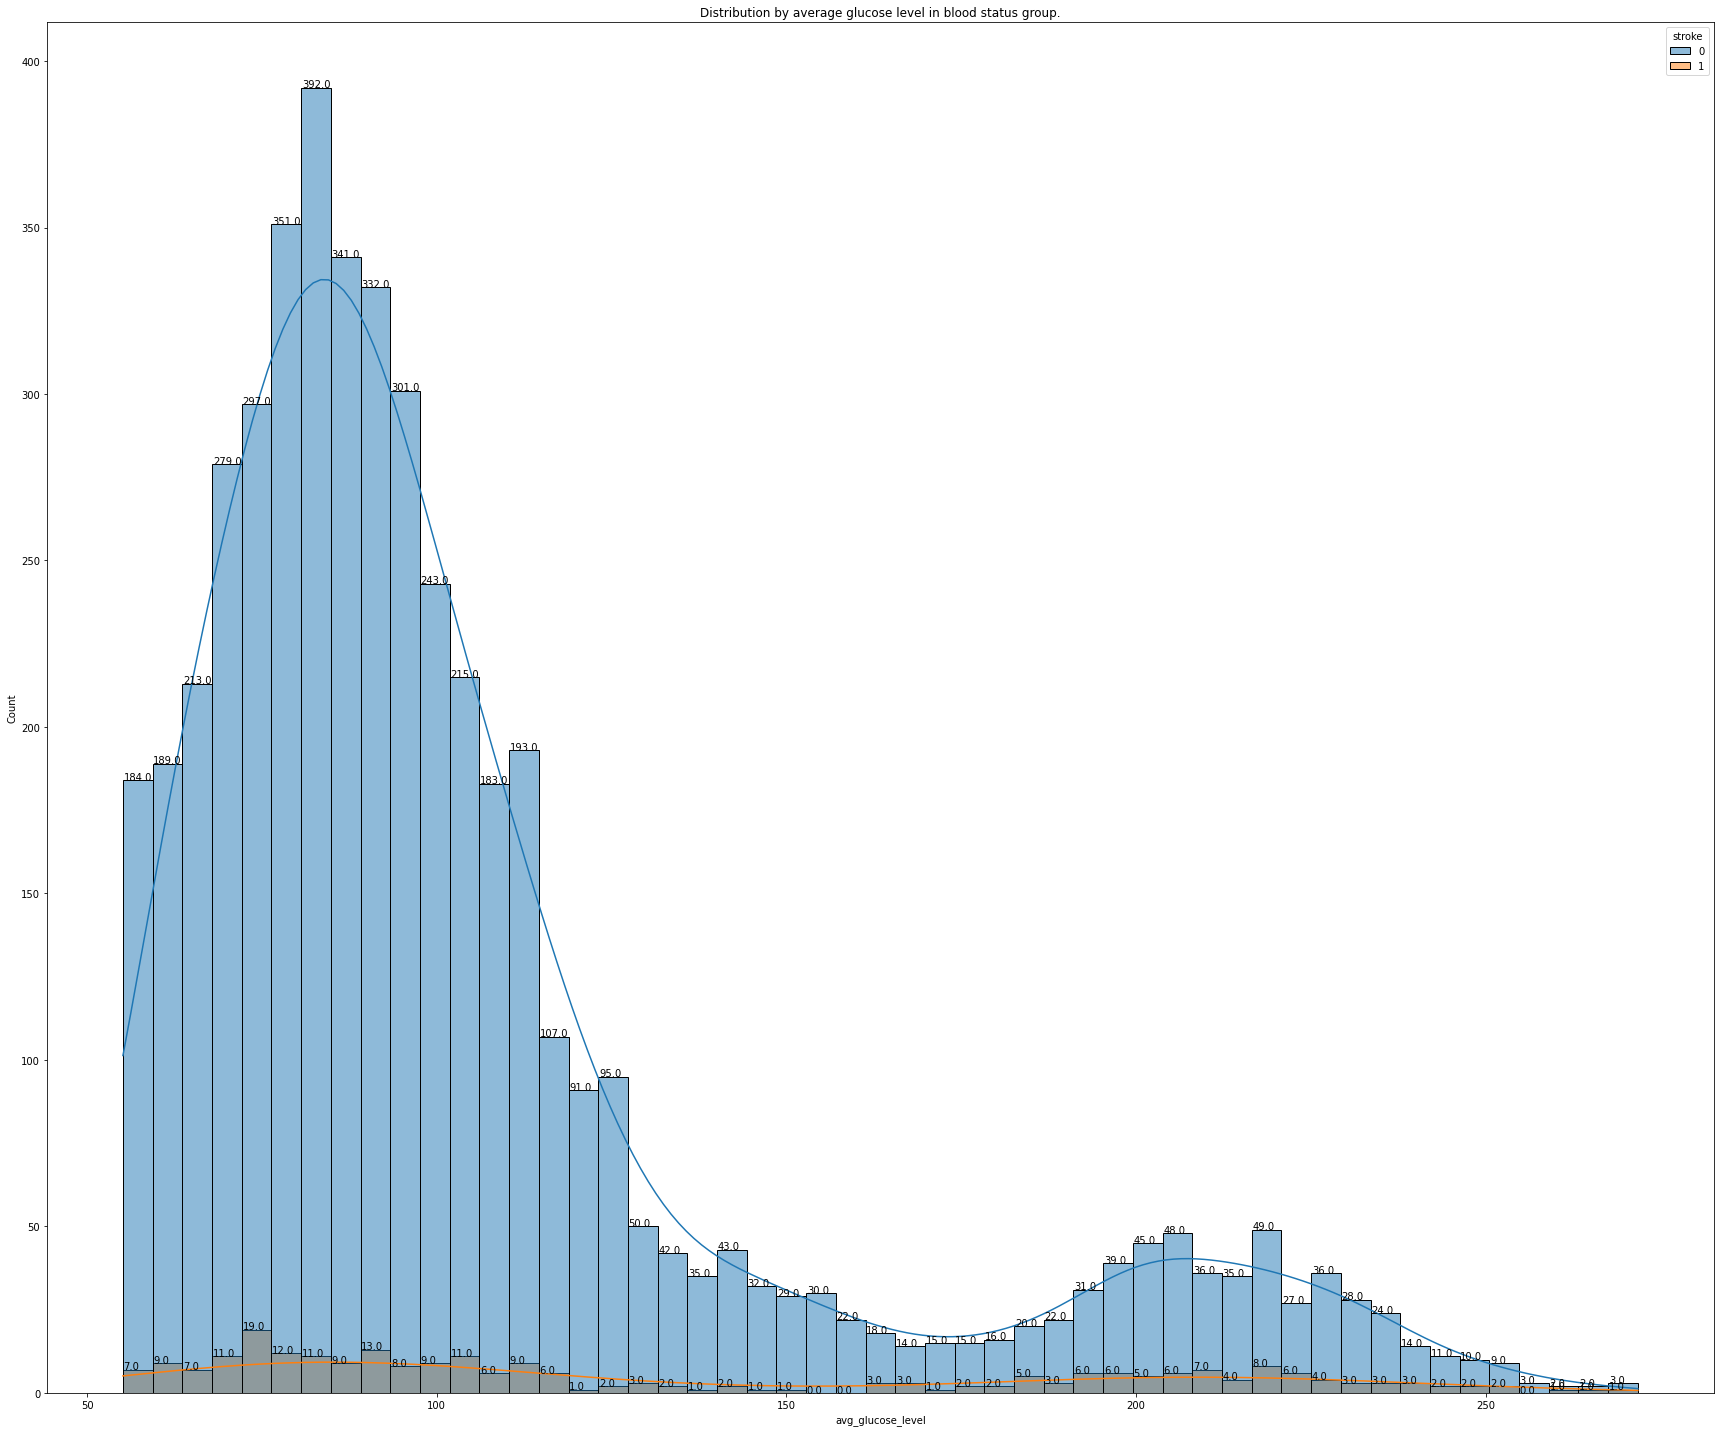

In [ ]:
plt.rcParams["figure.figsize"] = [24.00, 20.0]
plt.rcParams["figure.autolayout"] = True
ax = sns.histplot(df2, x="avg_glucose_level",kde='True', hue = 'stroke')
plt.title('Distribution by average glucose level in blood status group.')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.05))
plt.show()


In [ ]:
print('People have low avg_glucose_level: ')
print(df[(df.avg_glucose_level < df.avg_glucose_level.mean()) & (df.stroke == 1)].avg_glucose_level.count()/ df[(df.avg_glucose_level < df.avg_glucose_level.mean())].avg_glucose_level.count()*100)
print('People have high avg_glucose_level: ')
print(df[(df.avg_glucose_level >= df.avg_glucose_level.mean()) & (df.stroke == 1)].avg_glucose_level.count()/ df[(df.avg_glucose_level >= df.avg_glucose_level.mean())].avg_glucose_level.count()*100)
#Most people having a stroke usually have a higher Average glucose level than those who never had a stroke because high glucose level sugar can cause atherosclerosis

People have low avg_glucose_level: 
3.6353144835545295
People have high avg_glucose_level: 
7.481751824817519


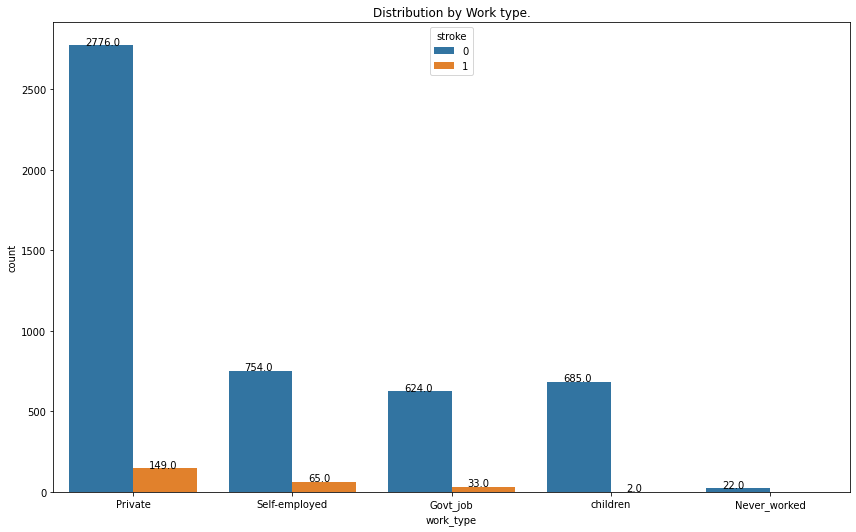

In [ ]:
plt.rcParams["figure.figsize"] = [12.00, 7.50]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x = df2['work_type'], hue = df['stroke'])
plt.title('Distribution by Work type.')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.05))
plt.show()
#Private: 5%, self-employed:8%, govt_job: 5%

# 3. Data *Processing*

## Clean unknown data

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
maxfreq = df["bmi"].mode().iloc[0]

In [ ]:
df["bmi"] = df["bmi"].fillna(maxfreq)
display(df)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.7,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


##Encoding

###ever_married feature

In [ ]:
df['ever_married'] = np.where((df.ever_married == 'Yes'),1,0)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,28.7,never smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,Private,Urban,83.75,28.7,never smoked,0
5106,44873,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


###Residence_type feature

In [ ]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [ ]:
df['Residence_type'] = np.where((df.Residence_type == 'Urban'),1,0)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,28.7,never smoked,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,Private,1,83.75,28.7,never smoked,0
5106,44873,Female,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


###smoking_status feature

In [ ]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
df.loc[(df.smoking_status == 'Unknown'),'smoking_status']=-1
df.loc[(df.smoking_status == 'never smoked'),'smoking_status']=0
df.loc[(df.smoking_status == 'formerly smoked'),'smoking_status']=1
df.loc[(df.smoking_status == 'smokes'),'smoking_status']=2
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.6,1,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,28.7,0,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.5,0,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.4,2,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,Private,1,83.75,28.7,0,0
5106,44873,Female,81.0,0,0,1,Self-employed,1,125.20,40.0,0,0
5107,19723,Female,35.0,0,0,1,Self-employed,0,82.99,30.6,0,0
5108,37544,Male,51.0,0,0,1,Private,0,166.29,25.6,1,0


###work_type feature

In [ ]:
df = pd.get_dummies(df, columns = ['work_type'], drop_first=True)

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,Male,67.0,0,1,1,1,228.69,36.6,1,1,0,1,0,0
1,51676,Female,61.0,0,0,1,0,202.21,28.7,0,1,0,0,1,0
2,31112,Male,80.0,0,1,1,0,105.92,32.5,0,1,0,1,0,0
3,60182,Female,49.0,0,0,1,1,171.23,34.4,2,1,0,1,0,0
4,1665,Female,79.0,1,0,1,0,174.12,24.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,1,1,83.75,28.7,0,0,0,1,0,0
5106,44873,Female,81.0,0,0,1,1,125.20,40.0,0,0,0,0,1,0
5107,19723,Female,35.0,0,0,1,0,82.99,30.6,0,0,0,0,1,0
5108,37544,Male,51.0,0,0,1,0,166.29,25.6,1,0,0,1,0,0


###gender feature

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df.loc[(df.gender == 'Male'),'gender'] = 0
df.loc[(df.gender == 'Female'),'gender'] = 1
df.loc[(df.gender == 'Other'),'gender'] = 2
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,0,67.0,0,1,1,1,228.69,36.6,1,1,0,1,0,0
1,51676,1,61.0,0,0,1,0,202.21,28.7,0,1,0,0,1,0
2,31112,0,80.0,0,1,1,0,105.92,32.5,0,1,0,1,0,0
3,60182,1,49.0,0,0,1,1,171.23,34.4,2,1,0,1,0,0
4,1665,1,79.0,1,0,1,0,174.12,24.0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,1,83.75,28.7,0,0,0,1,0,0
5106,44873,1,81.0,0,0,1,1,125.20,40.0,0,0,0,0,1,0
5107,19723,1,35.0,0,0,1,0,82.99,30.6,0,0,0,0,1,0
5108,37544,0,51.0,0,0,1,0,166.29,25.6,1,0,0,1,0,0


In [ ]:
df = df[  [ col for col in df.columns if col != 'stroke' ] + ["stroke"]]

In [ ]:
display(df)

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,stroke
0,9046,0,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,1
1,51676,1,61.0,0,0,1,0,202.21,28.7,0,0,0,1,0,1
2,31112,0,80.0,0,1,1,0,105.92,32.5,0,0,1,0,0,1
3,60182,1,49.0,0,0,1,1,171.23,34.4,2,0,1,0,0,1
4,1665,1,79.0,1,0,1,0,174.12,24.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,1,83.75,28.7,0,0,1,0,0,0
5106,44873,1,81.0,0,0,1,1,125.20,40.0,0,0,0,1,0,0
5107,19723,1,35.0,0,0,1,0,82.99,30.6,0,0,0,1,0,0
5108,37544,0,51.0,0,0,1,0,166.29,25.6,1,0,1,0,0,0


##Normalization

In [ ]:
def normaliztion(col):
  max = col.max()
  min = col.min()
  return (col - min)/(max-min)

In [ ]:
df.avg_glucose_level = normaliztion(df.avg_glucose_level)
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,stroke
0,9046,0,67.0,0,1,1,1,0.801265,36.6,1,0,1,0,0,1
1,51676,1,61.0,0,0,1,0,0.679023,28.7,0,0,0,1,0,1
2,31112,0,80.0,0,1,1,0,0.234512,32.5,0,0,1,0,0,1
3,60182,1,49.0,0,0,1,1,0.536008,34.4,2,0,1,0,0,1
4,1665,1,79.0,1,0,1,0,0.549349,24.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,1,0.132167,28.7,0,0,1,0,0,0
5106,44873,1,81.0,0,0,1,1,0.323516,40.0,0,0,0,1,0,0
5107,19723,1,35.0,0,0,1,0,0.128658,30.6,0,0,0,1,0,0
5108,37544,0,51.0,0,0,1,0,0.513203,25.6,1,0,1,0,0,0


#4. Build Logistic Model

##a. Prepare data

### Create train/test set

###Create input and labes

In [ ]:
y = np.array(df.stroke)
X = np.array(df.drop(['stroke', 'id'], axis = 1))

In [ ]:
X

array([[0, 67.0, 0, ..., 1, 0, 0],
       [1, 61.0, 0, ..., 0, 1, 0],
       [0, 80.0, 0, ..., 1, 0, 0],
       ...,
       [1, 35.0, 0, ..., 0, 1, 0],
       [0, 51.0, 0, ..., 1, 0, 0],
       [1, 44.0, 0, ..., 0, 0, 0]], dtype=object)

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

###Train/test set split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train = y_train.reshape(4088, 1)
y_test = y_test.reshape(1022, 1)

In [ ]:
X_train, X_test, y_train, y_test = X_train.T.astype(float), X_test.T.astype(float), y_train.T.astype(float), y_test.T.astype(float)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(13, 4088)
(1, 4088)






##b. Build model




### Sigmoid function


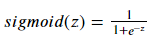

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    z = z.astype(float)
    s = 1/(1 + np.exp((-1) * z))

    return s

### Initialize parameters

In [ ]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """

    w = np.zeros((dim, 1))
    b = float(0)

    return w, b

### Propagate

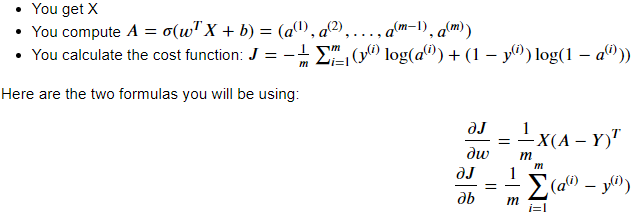

In [ ]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (number of features, 1)
    b -- bias, a scalar
    X -- data of size (number of features, number of examples)
    Y -- true "label" vector (containing 0 if non-heart stroke , 1 if heart stroke) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """

    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + b)
    cost = np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) * (-1/m)

    dw = np.dot(X, (A - Y).T) / m
    db = np.sum(A - Y) / m

    cost = np.squeeze(np.array(cost))


    grads = {"dw": dw,
             "db": db}

    return grads, cost

### Optimize w and b

The goal is to learn  𝑤  and  𝑏  by minimizing the cost function  𝐽 . For a parameter  𝜃 , the update rule is  𝜃=𝜃−𝛼 𝑑𝜃 , where  𝛼  is the learning rate.

In [ ]:
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (number of features, 1)
    b -- bias, a scalar
    X -- data of shape (number of features, number of examples)
    Y -- true "label" vector (containing 0 if non-heart stroke , 1 if heart stroke) of size (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    1) Calculate the cost and the gradient for the current parameters. Use propagate().
    2) Update the parameters using gradient descent rule for w and b.
    """

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)

    costs = []

    for i in range(num_iterations):

        grads, cost = propagate(w,b,X,Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - dw*learning_rate
        b = b - db*learning_rate

        if i % 100 == 0:
            costs.append(cost)

            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

### Prediction

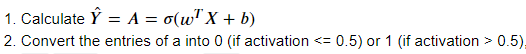

In [ ]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (number of features, 1)
    b -- bias, a scalar
    X -- data of size (number of features, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    A = sigmoid(np.dot(w.T, X) + b)


    for i in range(A.shape[1]):

        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0

    return Y_prediction

##c. Turn everything into model

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.005, print_cost=False):
    """
    Builds the logistic regression model

    Arguments:
    X_train -- training set represented by a numpy array of shape (number of features, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (number of features, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    w,b = initialize_with_zeros(X_train.shape[0])

    params, grads, costs = optimize(w,b,X_train,Y_train, num_iterations= num_iterations, learning_rate= learning_rate, print_cost= print_cost)


    w = params["w"]
    b = params["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w,b, X_train)

    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

### Make predict and optimize hyperparameter



#### Make prediction

In [ ]:
Logistic_model = model(X_train, y_train, X_test, y_test, print_cost= True, num_iterations= 2000, learning_rate=0.001)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.204993
Cost after iteration 200: 0.190875
Cost after iteration 300: 0.186739
Cost after iteration 400: 0.185222
Cost after iteration 500: 0.184588
Cost after iteration 600: 0.184295
Cost after iteration 700: 0.184145
Cost after iteration 800: 0.184059
Cost after iteration 900: 0.184002
Cost after iteration 1000: 0.183958
Cost after iteration 1100: 0.183920
Cost after iteration 1200: 0.183886
Cost after iteration 1300: 0.183853
Cost after iteration 1400: 0.183822
Cost after iteration 1500: 0.183790
Cost after iteration 1600: 0.183759
Cost after iteration 1700: 0.183728
Cost after iteration 1800: 0.183697
Cost after iteration 1900: 0.183666
train accuracy: 95.2788649706458 %
test accuracy: 93.83561643835617 %


#### Optimize learning rate

Training a model with learning rate: 0.1

-------------------------------------------------------

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



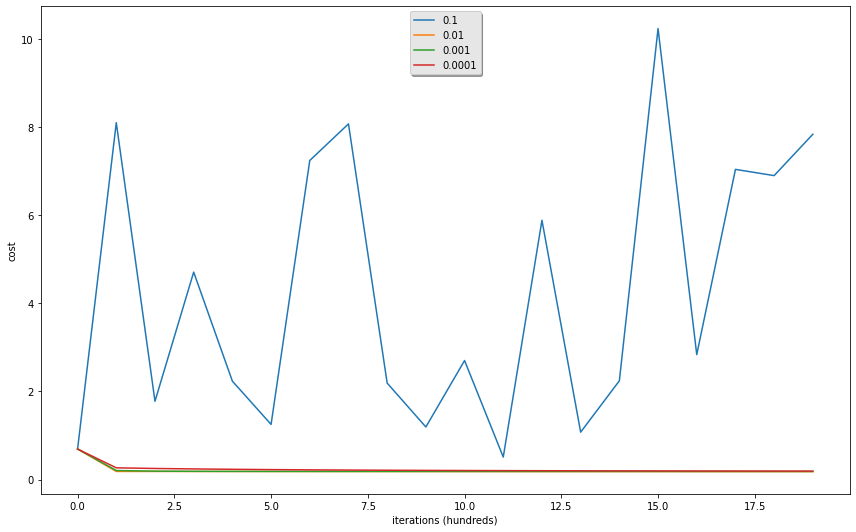

In [ ]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()


Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



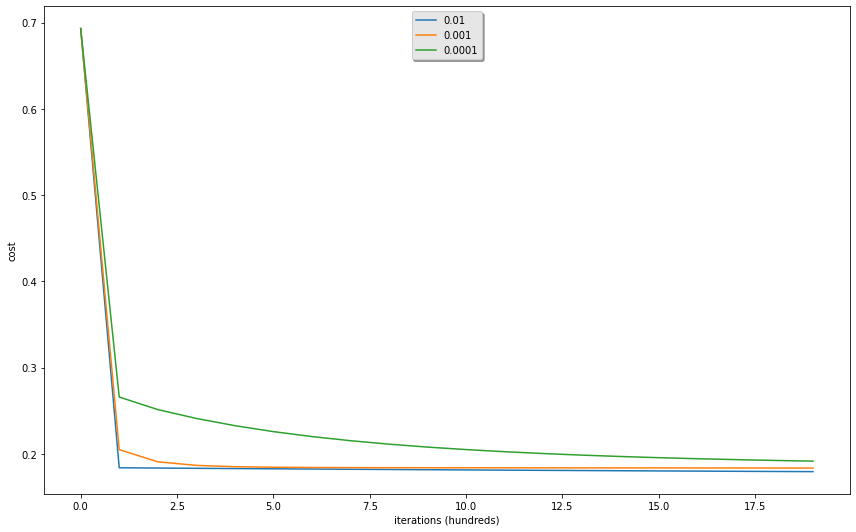

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()


### Prediction using tuned learning rate

In [ ]:
Logistic_model = model(X_train, y_train, X_test, y_test, print_cost= True, num_iterations= 500, learning_rate=0.01)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.183971
Cost after iteration 200: 0.183649
Cost after iteration 300: 0.183347
Cost after iteration 400: 0.183054
train accuracy: 95.30332681017613 %
test accuracy: 93.9334637964775 %


#5. Using LogisticRegression from sklearn library

In [ ]:
from sklearn.linear_model import LogisticRegression
# Default rigde regularization
model = LogisticRegression(max_iter= 2000)
model.fit(X_train.T, y_train.reshape(4088,))
predicted_test = model.predict(X_test.T)
predicted_train = model.predict(X_train.T)
print("train accuracy: {} %".format(100 - np.mean(np.abs(predicted_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(predicted_test - y_test)) * 100))

train accuracy: 95.42563600782779 %
test accuracy: 93.9334637964775 %
